In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

In [4]:
raw_data = pd.read_csv('1.04. Real-life example.csv')

In [117]:
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [118]:
# Descriptive stats
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [119]:
# Checking for NaN values
raw_data.isna().sum()
# Cleaning NaN
data_clean1 = raw_data.dropna(axis=0)
data_clean1.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


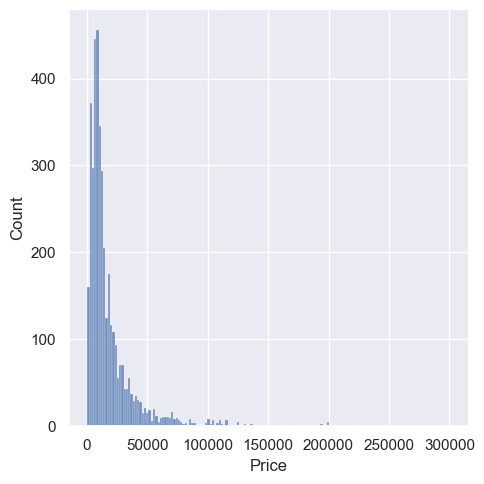

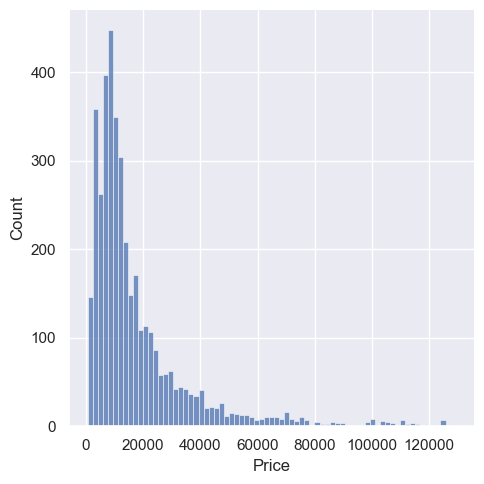

In [120]:
# Exploring outliers in Price Column
sns.displot(data_clean1.Price)

# Cleaning Outliers
q = data_clean1['Price'].quantile(0.99)
data_clean2 = data_clean1[data_clean1['Price'] < q]

# Checking new distribution
sns.displot(data_clean2.Price)

# We have successfully cleaned the outliers in Price column

C:\Users\aleqs\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
20,Toyota,38233.00,other,0,2.40,Diesel,yes,2016,Hilux
104,Mercedes-Benz,107999.00,crossover,0,2.98,Diesel,yes,2016,GLS 350
145,Mercedes-Benz,87777.00,van,0,2.20,Diesel,yes,2016,V 250
190,Toyota,99999.00,crossover,0,4.50,Diesel,yes,2016,Land Cruiser 200
234,Mercedes-Benz,109999.00,crossover,0,3.00,Diesel,yes,2016,GLS 350
...,...,...,...,...,...,...,...,...,...
4274,Mercedes-Benz,109999.00,crossover,0,2.98,Diesel,yes,2016,GLS 350
4277,Mercedes-Benz,111999.00,crossover,0,3.00,Diesel,yes,2016,GL 350
4289,Toyota,17394.09,hatch,0,1.33,Petrol,yes,2016,Yaris
4322,Toyota,100000.00,crossover,0,4.50,Diesel,yes,2016,Land Cruiser 200


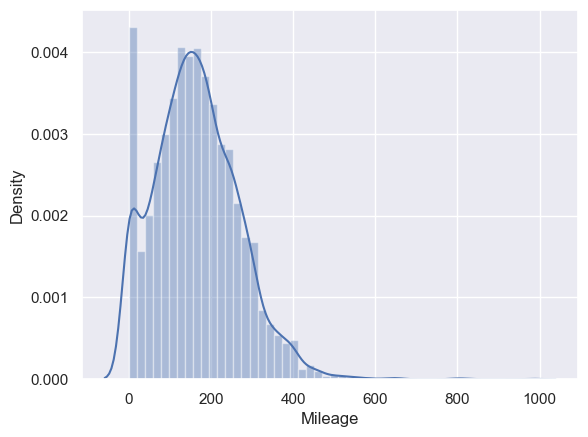

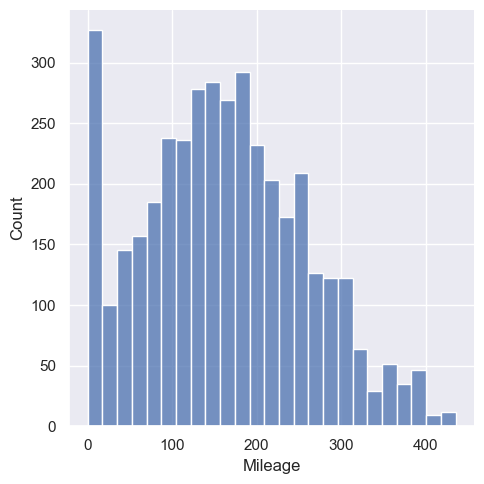

In [121]:
sns.distplot(data_clean2.Mileage)
# It would be a good idea to clean up outliers from Mileage column as well, since 1 or 2 cars that have high mileage will
# not have a huge impact in predicting prices.
q = data_clean2['Mileage'].quantile(0.99)
data_clean2 = data_clean2[data_clean2['Mileage'] < q]
sns.displot(data_clean2.Mileage)

data_clean2[data_clean2['Mileage'] == 0]

# We have a much better distribution of Mileage now, also we can see that dataset is from 2016, since there are a 
# lot of cars with 0 mileage, meaning that they've just been released.

C:\Users\aleqs\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3922,3922.000000,3922,3922.000000,3922.000000,3922,3922,3922.000000,3922
unique,7,NaN,6,NaN,NaN,4,2,NaN,298
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,862,NaN,1500,NaN,NaN,1818,3560,NaN,185
mean,NaN,17992.886272,NaN,161.279449,2.444531,NaN,NaN,2006.406425,NaN
std,NaN,19041.283610,NaN,96.056020,0.948292,NaN,NaN,6.595079,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21500.000000,NaN,229.000000,3.000000,NaN,NaN,2012.000000,NaN


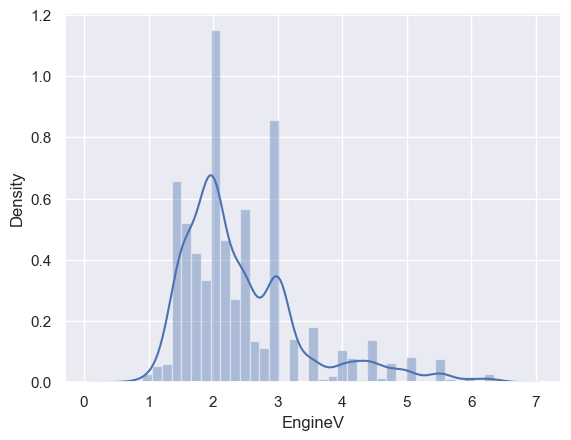

In [122]:
data_clean2.describe(include='all')
# Max value of Engine Volume is 99, which is virtually impossible as all the cars on the market have engine volume
# smaller than 6.5, thus we need to take care of those incorrect inputs.
data_clean3 = data_clean2[data_clean2['EngineV'] <= 6.5]
sns.distplot(data_clean3.EngineV)
# OK, now we have have cleaned up incorrect engine volume inputs and can move forward.
data_clean3.describe(include='all')

In [123]:
# Let's explore outliers in our last numerical column - Year. We can see the minimum value is 1969.
# It is not a good idea to include cars that are too old for modern price prediction model. Lets clean that up.
q = data_clean3['Year'].quantile(0.01)
data_clean4 = data_clean3[data_clean3['Year'] > q]
data_clean4.describe(include='all')
# Much Better, minimum year is 1988, we can work with that.
data_cleaned = data_clean4.reset_index(drop=True)
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
3863,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,T5 (Transporter)
3864,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla
3865,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
3866,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535


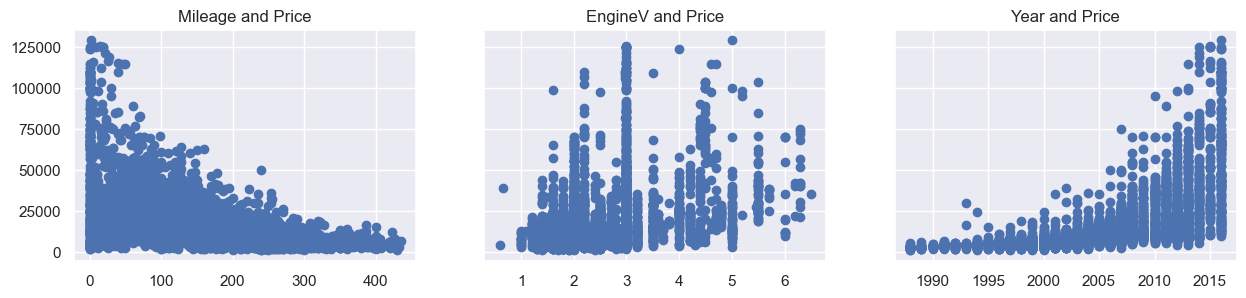

In [124]:
# Let's create scatter plots to see the relationship between (Mileage, EngineV and Year) vs Price
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15, 3))
ax1.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax1.set_title('Mileage and Price')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('EngineV and Price')
ax3.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax3.set_title('Year and Price')

plt.show()

# Relationships are pretty clear: Lower the mileage higher the price; Newer the car higher the price;
# The most interesting relationship is Engine volume and price - it's not a linear relationship - actually cars with
# Engine volumes of 3 and 4 to 5 cost the highest; This is explained with fuel economy being the priority.
# High Engine Volume means that car is high-maintenance, fuel costs are high and engine probably lasts less.

In [125]:
# Relaxing assumptions
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,9.814656


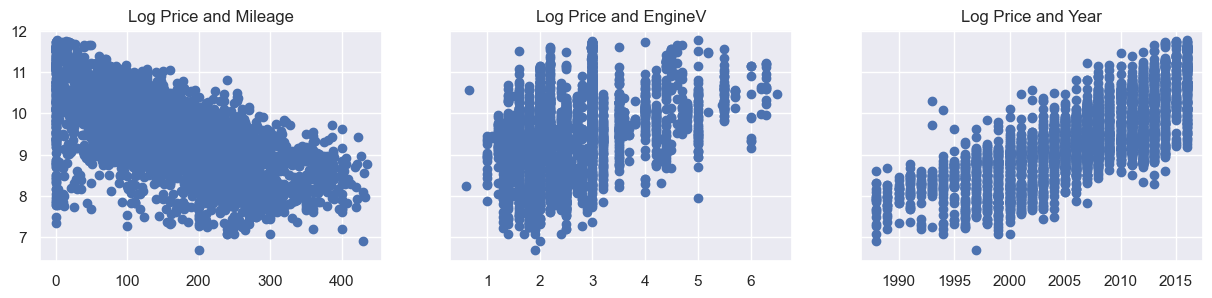

In [126]:
#Scatter plots with log prices
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15, 3))
ax1.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax1.set_title('Log Price and Mileage')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Year'], data_cleaned['log_price'])
ax3.set_title('Log Price and Year')

plt.show()

In [127]:
# data_cleaned = data_cleaned.drop(['Price'], axis=1)
data_cleaned.columns.values

cols = ['log_price', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model']

data_cleaned = data_cleaned[cols]
data_cleaned

,log_price,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,8.342840,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,8.974618,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,9.495519,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,10.043249,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,9.814656,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
3863,9.350102,11500.0,van,163,2.5,Diesel,yes,2008,T5 (Transporter)
3864,9.792556,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla
3865,11.736069,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
3866,8.779557,6500.0,sedan,1,3.5,Petrol,yes,1999,535


In [131]:
# Now let's check our data for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage', 'EngineV', 'Year']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns
vif
# We can see that feature 'year''s VIF is more than 10 and it will be messing up our model, so we should drop it. 
data_nomulti = data_cleaned.drop(['Year'], axis=1)

In [132]:
# Now it's time to deal with 'Model' column, the problem is there's too many different models and it will be pointless,
# to create dummies for all of them, let's see first which models are the most frequent
data_with_dummies = pd.get_dummies(data_nomulti, drop_first=True)
data_with_dummies.columns.values

array(['log_price', 'Price', 'Mileage', 'EngineV', 'Body_hatch',
       'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes', 'Model_100', 'Model_11', 'Model_116',
       'Model_118', 'Model_120', 'Model_19', 'Model_190', 'Model_200',
       'Model_210', 'Model_220', 'Model_230', 'Model_25', 'Model_250',
       'Model_300', 'Model_316', 'Model_318', 'Model_320', 'Model_323',
       'Model_325', 'Model_328', 'Model_330', 'Model_335',
       'Model_4 Series Gran Coupe', 'Model_428', 'Model_4Runner',
       'Model_5 Series', 'Model_5 Series GT', 'Model_520', 'Model_523',
       'Model_524', 'Model_525', 'Model_528', 'Model_530', 'Model_535',
       'Model_540', 'Model_545', 'Model_550', 'Model_6 Series Gran Coupe',
       'Model_630', 'Model_640', 'Model_645', 'Model_650', 'Model_730',
       'Model_735', 'Model_740', 'Model_745', 'Model_750', 'Model_760',
       'Model_80', 'Model_9', 'Model_9

In [133]:
target = data_with_dummies['log_price']
features = data_with_dummies.drop(['log_price'], axis=1)

In [134]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(features)

features_scaled = scaler.transform(features)

In [135]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=365)

In [136]:
regr = LinearRegression()
regr.fit(X_train, y_train)

yhat = regr.predict(X_train)

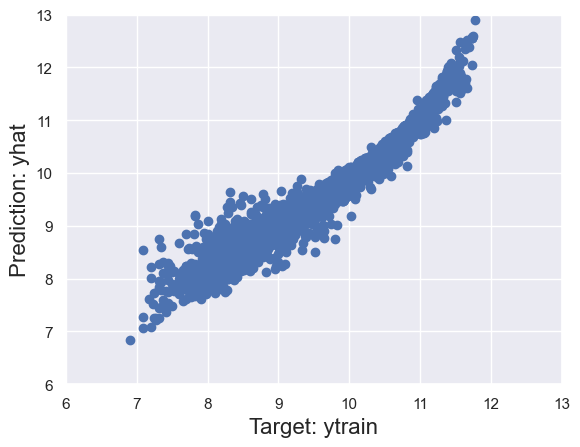

In [138]:
plt.scatter(y_train, yhat)
plt.xlabel('Target: ytrain', fontsize=16)
plt.ylabel('Prediction: yhat', fontsize=16)
plt.xlim(6, 13)
plt.ylim(6, 13)
plt.show()

C:\Users\aleqs\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals')

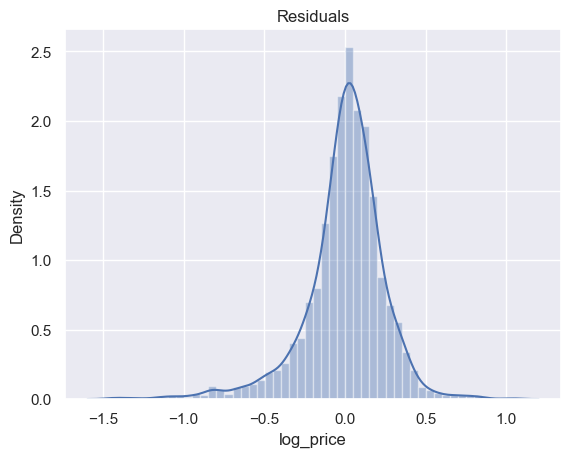

In [139]:
sns.distplot(y_train - yhat)
plt.title('Residuals')

In [141]:
regr.score(X_train, y_train)
# We have actually increased the r-squared by 0.16 compared to the last regression model by adding 'Model' and removing
# 'Brand' column.

0.919033087050003

In [142]:
regr.coef_

array([ 5.05946847e-01, -1.68618000e-01,  7.78209148e-02, -1.91110476e-02,
        1.10791399e-02,  2.33866023e-03, -3.99346499e-03,  1.03093337e-02,
       -3.94206466e-02, -9.69289152e-03, -4.56754296e-02,  2.41092782e-01,
        3.17510188e-03, -2.38440731e+12,  2.92322794e-02,  3.12910020e-02,
       -6.77381234e-03, -6.34837321e-03,  4.42421321e-03,  1.61182757e-02,
        9.21665347e-03,  2.09447920e-02,  6.91810534e-03, -1.65937106e-02,
        6.31778258e-03, -5.72667431e-03,  1.14251022e-02,  3.65441263e-02,
        7.91996310e-02, -3.18838575e+11,  2.29214504e-02,  2.47965390e-02,
        3.37441001e-02, -2.06958555e+12,  1.24066834e-02,  1.58153954e-02,
        1.58807654e-02,  1.86095440e-02,  2.65271108e-02,  1.05819526e-01,
        3.41029953e-02,  2.16557835e+12,  4.19623900e-02,  4.43063058e-02,
        7.78202001e-02,  4.53873991e-02,  1.18351207e-02,  1.18369121e-02,
        1.66084183e-02,  5.55286273e-03,  1.54647481e-02,  1.57638078e-02,
        1.66789205e-02,  

In [143]:
regr.intercept_

60477145100.04996

In [144]:
regr_summary = pd.DataFrame(features.columns.values, columns=['Features'])
regr_summary['Weights'] = regr.coef_
regr_summary.sample(15)

,Features,Weights
53,Model_650,5.348053e+10
193,Model_ML 500,1.864385e-02
7,Body_van,1.030933e-02
114,Model_Carisma,9.282563e-03
123,Model_E-Class,1.476420e-01
208,Model_Passat B3,-1.063727e-02
8,Engine Type_Gas,-3.942065e-02
246,Model_Sandero StepWay,7.635700e-03
72,Model_A6,1.277307e-01
19,Model_200,1.611828e-02


In [145]:
yhat_test = regr.predict(X_test)

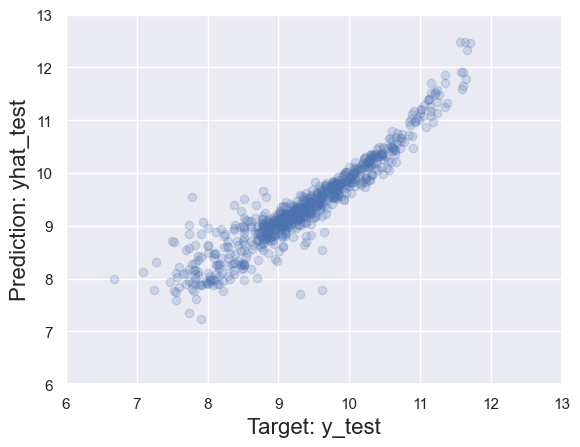

In [148]:
plt.scatter(y_test, yhat_test, alpha=0.2)
plt.xlabel('Target: y_test', fontsize=16)
plt.ylabel('Prediction: yhat_test', fontsize=16)
plt.xlim(6, 13)
plt.ylim(6, 13)
plt.show()

In [149]:
df_pf = pd.DataFrame(np.exp(yhat_test), columns=['Prediction'])
df_pf.head()

C:\Users\aleqs\AppData\Local\Temp\ipykernel_11252\2713343553.py:1: RuntimeWarning: overflow encountered in exp
  df_pf = pd.DataFrame(np.exp(yhat_test), columns=['Prediction'])


,Prediction
0,8245.144501
1,19723.017348
2,3506.054829
3,35366.161148
4,10117.897428


In [156]:
df_pf['Target'] = np.exp(y_test)
df_pf

y_test = y_test.reset_index(drop=True)
y_test

df_pf['Target'] = np.exp(y_test)
df_pf

df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
661,17624.65,17639.47,14.82,0.08
150,9490.54,9500.00,9.46,0.10
765,9789.41,9800.00,10.59,0.11
137,108185.05,107999.00,-186.05,0.17
323,9829.97,9800.00,-29.97,0.31
335,10664.15,10700.00,35.85,0.34
134,11458.78,11500.00,41.22,0.36
400,31196.48,31310.00,113.52,0.36
144,12948.10,12900.00,-48.10,0.37
358,9563.00,9599.00,36.00,0.38


### Now, we have to say that there are some very incosistent results in about 2-5% of the test data, where prediction appears to be minus or plus infinity. In Our last model we didn't have that kind of incosistency. However for the most of the data predictions are much more accurate. 